<a href="https://colab.research.google.com/github/SirimarcoUERJ/MachineLearning/blob/main/ArvoreDeDecisao_Census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Árvore de Decisão Base do Census**

In [100]:
import pickle as pkl

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
arq = "/content/drive/MyDrive/Colab Notebooks/Machine Learn/data/census(SemEscalonar).pkl"
with open(arq, "rb") as f:
  x_treino, y_treino, x_teste, y_teste = pkl.load(f)

In [102]:
x_treino.shape, y_treino.shape

((27676, 108), (27676,))

In [103]:
x_teste.shape, y_teste.shape

((4885, 108), (4885,))

In [104]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
arvore_census = DecisionTreeClassifier(criterion="entropy", random_state=0)
arvore_census.fit(x_treino, y_treino)

previsoes = arvore_census.predict(x_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [106]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [107]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_score(y_teste, previsoes)

0.8102354145342886

In [108]:
confusion_matrix(y_teste, previsoes)

array([[3226,  467],
       [ 460,  732]])

0.8102354145342886

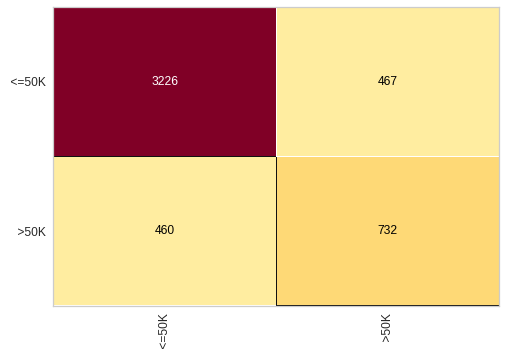

In [109]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [110]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

